## Time series assignment solution

In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from time_series_helpers import (to_col_vector, 
                                 reindex_to_data_frame, 
                                 PolynomialBasisExpansion,
                                 PolynomialBasisAndDummyizer)

# Always make it pretty.
plt.style.use('ggplot')

# We get some interger -> float typecast warning from sklean below, this keeps them out of our hair.
import warnings
warnings.filterwarnings('ignore')


The number of live births (in thousands) per month in the U.S. was collected for the past 31 years (data/birth.txt) starting in January 1980 and ending December, 2010. We will be exploring this time series using various methods and predict the birth counts for 2011.

**Q:** Load the data into a pandas dataframe.

Let's set the working directory to the one containing *this file* so we can use relative paths.

**You need to change this path so that the data will load correctly**

In [2]:
births = pd.read_csv("./data/birth.txt")

It's always a good idea to take a look and make sure the data looks like we anticipate.

In [3]:
births.head()

,num_births
0,295
1,286
2,300
3,278
4,272


**Q:** Use `pandas.date_range()` to create a dates variable (from January 1980 and ending December, 2010).

In [4]:
# The second argument is not included in the returned range, so overshoot by one month.
date_range = pd.date_range('1980-01', '2011-01', freq='M')

In [5]:
date_range

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30',
               '2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31',
               '2010-11-30', '2010-12-31'],
              dtype='datetime64[ns]', length=372, freq='M')

At this point, we should compare the length of this series to `wc births.txt` on the command line, or `births.shape[0]` to make sure everything lines up properly.

The following assert with throw an exception if anything in amiss.

In [6]:
print("Number of dates: ", len(date_range))
print("Number of births: ", births.shape[0])
assert(len(date_range) == births.shape[0])

Number of dates:  372
Number of births:  372


**Q:** Create a time variable (range: 1-372) to be used later in the regressions and both a month and year variable (use `pd.DatetimeIndex` to strip these values from your dates).

In [7]:
# Using unix speak here, an epoch is a timespan since a fixed date.
epoch = np.arange(1, len(date_range)+1)
epoch

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [8]:
month = date_range.month
year = date_range.year
print(month)
print()
print(year)

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', length=372)

Int64Index([1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
            ...
            2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
           dtype='int64', length=372)


**Q:** Set the date_range variable as the index of your dataframe.

In [9]:
births = births.set_index(date_range)

In [10]:
births.head()

,num_births
1980-01-31,295
1980-02-29,286
1980-03-31,300
1980-04-30,278
1980-05-31,272


**Q:** Calculate some aggregated statistics by month and year. What months have the highest birthrates? Any intuition as to why?

In [11]:
births['month'] = month
births['year'] = year
births['epoch'] = epoch

In [12]:
year_avgs = births.groupby(['year'])['num_births'].mean()
year_avgs

year
1980    294.666667
1981    296.166667
1982    296.166667
1983    312.583333
1984    320.416667
1985    325.000000
1986    335.000000
1987    337.166667
1988    347.000000
1989    354.416667
1990    350.333333
1991    353.750000
1992    353.916667
1993    356.750000
1994    347.083333
1995    341.750000
1996    337.750000
1997    313.833333
1998    302.500000
1999    293.916667
2000    290.416667
2001    297.750000
2002    309.916667
2003    296.666667
2004    271.333333
2005    261.500000
2006    263.833333
2007    262.416667
2008    265.583333
2009    275.000000
2010    278.666667
Name: num_births, dtype: float64

In [13]:
month_avgs = births.groupby(['month'])['num_births'].mean()
month_avgs

month
1     306.225806
2     288.451613
3     308.935484
4     290.580645
5     300.483871
6     304.129032
7     327.870968
8     334.161290
9     330.032258
10    322.838710
11    305.645161
12    313.516129
Name: num_births, dtype: float64

It looks like
  - Births per month increased from the 80's into the 90's, but then decreased again from the 90's into the 00's.
  - There are less births per month in the winter months as compared to the summer months.
  
Note though, months generally do not have the same number of days, so there is a risk that we may see effects due to the difference in number of days across months.  A better statistic to aggregate would be *births per day*.

Below is a plot of these series, which makes the patterns more clear.

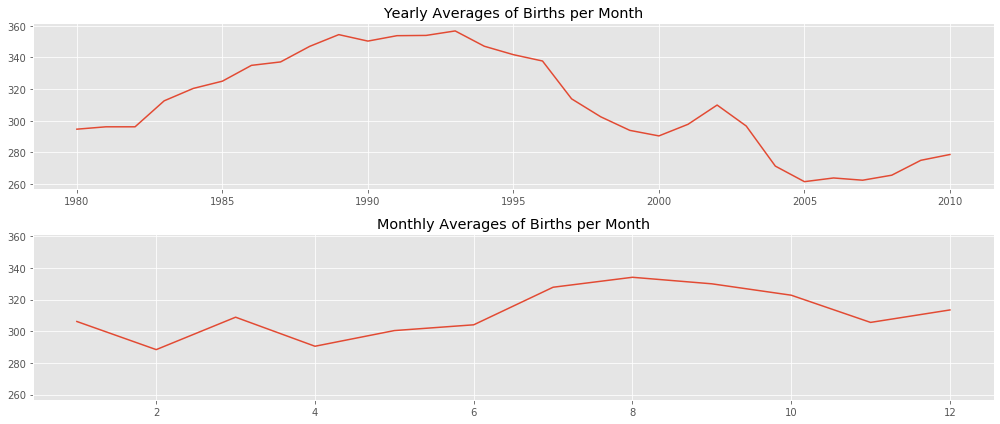

In [14]:
fig, ax = plt.subplots(2, sharey=True, figsize=(14, 6))

ax[0].plot(year_avgs.index, year_avgs)
ax[0].set_title("Yearly Averages of Births per Month")

ax[1].plot(month_avgs.index, month_avgs)
ax[1].set_title("Monthly Averages of Births per Month")

plt.tight_layout()

**Q:** Turn the num_births column into a time series using pd.Series().

Indexing into a `pandas.DataFrame` to grab a single column creates a `pandas.Series` withe same index, so there is really no need for the explicit call to `pd.Series`.

In [15]:
ts = births.num_births
ts.head()

1980-01-31    295
1980-02-29    286
1980-03-31    300
1980-04-30    278
1980-05-31    272
Freq: M, Name: num_births, dtype: int64

**Q:** Plot the overall data. What are your thoughts about the general pattern and or seasonal variation?

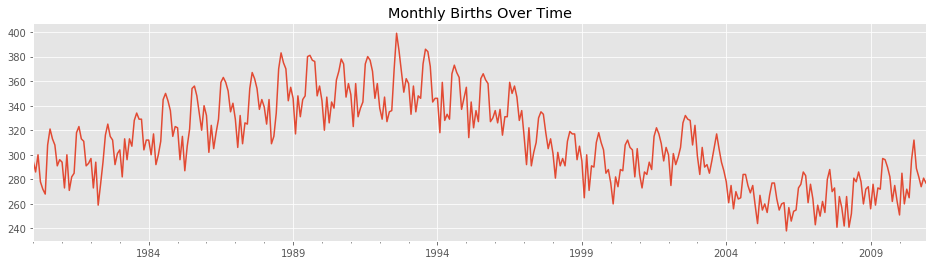

In [16]:
ts.plot(figsize=(16, 4), title="Monthly Births Over Time")

The cyclic trend and the seasonal variation were commented on in our remarks on the plots of yearly and monthly averages, and they are reinforced by what we see here.

Other observations
  - The decrease at end of year 2013 is very drastic and immediate.
  - The sub-seasonal variation shows a regular pattern of sawtooths, this is almost certainly caused by the unequal number of days in each month.  Again, plotting births *per day* over time is a better idea.

**Q:** Plot the data for 2006-2010, is the seasonal pattern more apparent?

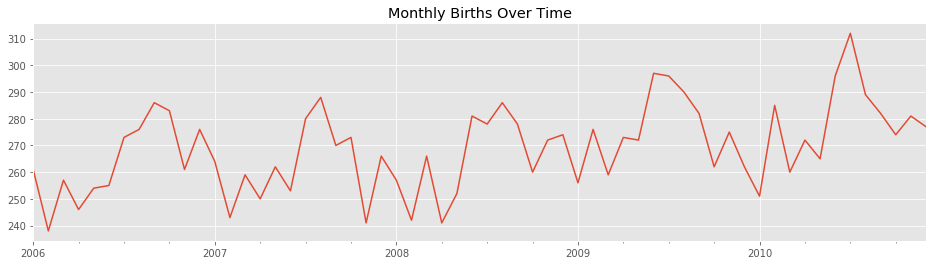

In [17]:
ts['2006':'2010'].plot(figsize=(16, 4), title="Monthly Births Over Time")

**Q:** Use df.resample('Q-NOV') to get quarterly means that follow the seasons of the year (spring, summer, fall, winter).

Note that `Q-NOV` creates a quarterly summary with "year" intervals that end in November.  As November is the end of fall, this results in the quarters that correspond to spring, summer, fall, and winter.

In [18]:
# This series has a new index with dates that delineate each quarter.
seasonal_means = ts.resample('Q-NOV', label='left').mean()

**Q:** Superimpose the yearly averages and the seasonal averages onto the monthly data.

In [19]:
# We created this series before, but this is a cleaner way.
annual_means = ts.resample('A', label='left').mean()

Superimposing the seasonal and annual averages onto the data frame is tricky, as our indices are no longer aligned.  Since we are going to have to do it twice, we wrote a function in `time_series_helpers.py` to handle the reindexing.

Here's a breakdown of the strategy:
  - `.resample('M').ffill()` creates a new series with a monthly index, and forward fills the seasonal averages.  Since we chose the *left* endpoint to mark our seasonal series, this is correct.
  - The resulting series has a few 1979 dates from winter months, so we subset to only dates starting in 1980 with `['1980':]`.
  - The resulting series is missing December 1980, so we reindex to the index of the `births` data frame.  This picks up a missing at the end of the series, so forward fill with the latest seasonal average.

In [20]:
births['seasonal_means'] = reindex_to_data_frame(seasonal_means, births, 'M')

In [21]:
births['annual_means'] = reindex_to_data_frame(annual_means, births, 'M')

In [22]:
# Yay!
births.head()

,num_births,month,year,epoch,seasonal_means,annual_means
1980-01-31,295,1,1980,1,290.500000,294.666667
1980-02-29,286,2,1980,2,283.333333,294.666667
1980-03-31,300,3,1980,3,283.333333,294.666667
1980-04-30,278,4,1980,4,283.333333,294.666667
1980-05-31,272,5,1980,5,299.000000,294.666667


Let's superimpose these seasonal and annual means on a full plot of the series to make sure we did it correctly.

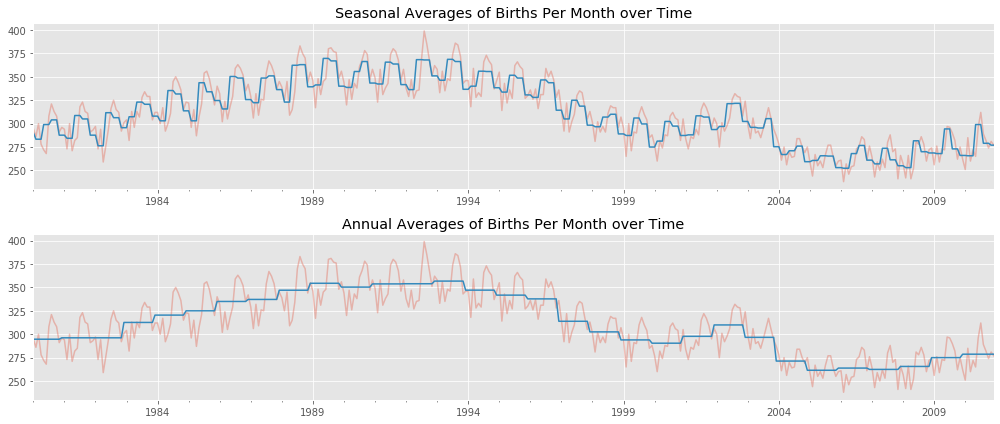

In [23]:
fig, axs = plt.subplots(2, sharey=True, figsize=(14, 6))

births.num_births.plot(ax=axs[0], alpha=0.33)
births.seasonal_means.plot(ax=axs[0])
axs[0].set_title("Seasonal Averages of Births Per Month over Time")

births.num_births.plot(ax=axs[1], alpha=0.33)
births.annual_means.plot(ax=axs[1])
axs[1].set_title("Annual Averages of Births Per Month over Time")

plt.tight_layout()

**Q:** Use time series regression methods to fit a model. Using `OLS` in `statsmodels`, fit the overall trend with increasing polynomial terms. 
- You will need to take your `time` variable and create `time^2, time^3, time^4, time^5`
- Increase model complexity by adding a higher order term.
- Examine the summary information and compare each model to the model before it (i.e. simple linear with `time` compared to 2nd order polynomial with `time` + `time^2`) by examining AIC/BIC.
- Superimpose (by plotting) the fitted onto the original data and predict the values for 2011.
- Keep increasing until general trend has been captured (You won't be able to capture the bump between 1999-2004 without a very complicated model and there's no reason to assume that future values wouldn't follow the more general trend) .

First lets create these polynomial basis expansions.

It's best practice to standardize features before doing any basis expansions to avoid floating point issues when powers gets large.  We've created a class `PolynomialBasisExpansion` in the companion python file that wraps a sklearn pipeline for this purpose.  This class takes a `degree` when initialized, and provides both `fit` and `transform` methods.

In [24]:
ply_basies = {degree: PolynomialBasisExpansion(degree) for degree in [1, 2, 3, 4, 5]}

for degree in ply_basies:
    ply_basies[degree].fit(births.epoch.values)

Let's plot the various degree polynomials vs. the data to make sure we've done everything properly.

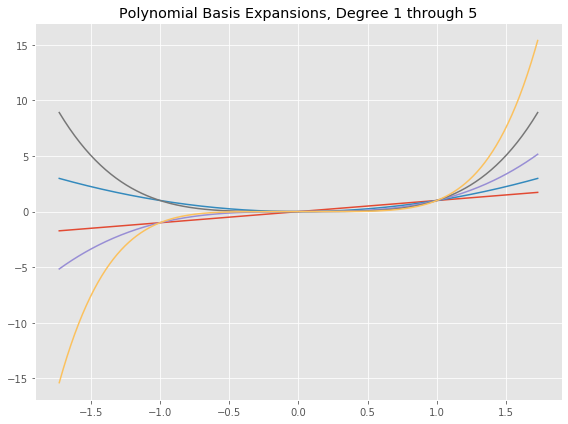

In [25]:
X = ply_basies[5].transform(births.epoch.values)

plt.figure(figsize=(8, 6))
for degree in [1, 2, 3, 4, 5]:
    plt.plot(X[:,1], X[:, degree], label="Degree {}".format(degree))
    
plt.title("Polynomial Basis Expansions, Degree 1 through 5")
plt.tight_layout()

Now we can move on to fit the linear regression models.

In [26]:
# One model for each degree 1-5, all stored in a dictionary.
regression_models = {}
for degree in ply_basies:
    training_data = ply_basies[degree].transform(births.epoch.values)
    regression_models[degree] = sm.OLS(births.num_births, training_data).fit()

Let's plot the predictions from all these models vs. the data to see how the fit evolves as the degree increases.

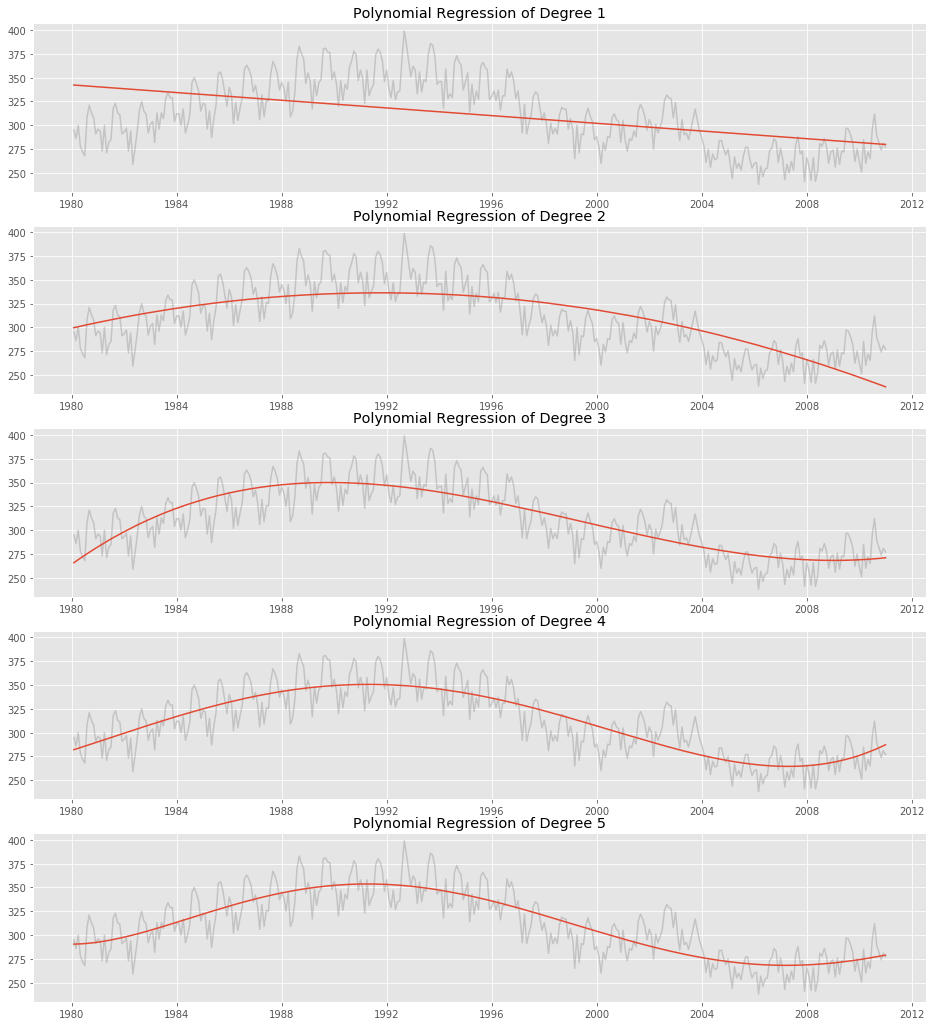

In [27]:
fig, axs = plt.subplots(5, figsize=(16, 18))

for ax, (degree, degree_model) in zip(axs, regression_models.items()):
    ax.plot(births.index, births.num_births, c="grey", alpha=0.33)
    preds = degree_model.predict(
        ply_basies[degree].transform(to_col_vector(births.epoch.values)))
    ax.plot(births.index, preds)
    ax.set_title("Polynomial Regression of Degree {}".format(degree))

As the assignment anticipated, we have not captured the upturn between 2000 and 2004.  This also causes the region immediately preceding the bump to be biased (the predictions are too high) due to the inflexibility of polynomial fits.  Possibly a [natural cubic spline ](http://stats.stackexchange.com/questions/149552/interpretation-of-bsx-and-gam-results/149579#149579) would do better.

Now let's look at the AIC/BIC fit statistics.  A sensible guess from the above plots is that the degree 5 curve does not add much, making degree 4 our best fit.

In [28]:
print("Model Comparison of AIC and BIC.")
for degree in regression_models:
    s = "Degree: {0}, AIC: {1:.2f}, BIC: {2:.2f}".format(
        degree,
        regression_models[degree].aic,
        regression_models[degree].bic)
    print(s)

Model Comparison of AIC and BIC.
Degree: 1, AIC: 3592.96, BIC: 3600.80
Degree: 2, AIC: 3400.06, BIC: 3411.82
Degree: 3, AIC: 3262.06, BIC: 3277.74
Degree: 4, AIC: 3231.33, BIC: 3250.92
Degree: 5, AIC: 3225.60, BIC: 3249.11


The AIC and BIC both agree that the best degree is 5.  Looking back at the plots, this may be because the degree 5 basis fits better at the boundaries of the data.

**Q:** Now that you have fit a trend, add in the monthly component via dummy variables to capture seasonality.  You could  also try to create a 'seasons of the year' variable and fit the quarterly time series instead of the original monthly time you plotted earlier...opportunity to play around.

We have included a class `PolynomialBasisAndDummyizer` in the companion code that combines a polynomial basis expansion with a dummy expander.

In [29]:
poly_basis_and_dummyizer = PolynomialBasisAndDummyizer(poly_spec={'epoch': 5}, dummy_list=['month'])
poly_basis_and_dummyizer.fit(births)
X = poly_basis_and_dummyizer.transform(births)

Now we can fit the linear model.

In [30]:
seasonal_model = sm.OLS(births.num_births, X).fit()

and plot the results vs. the data.

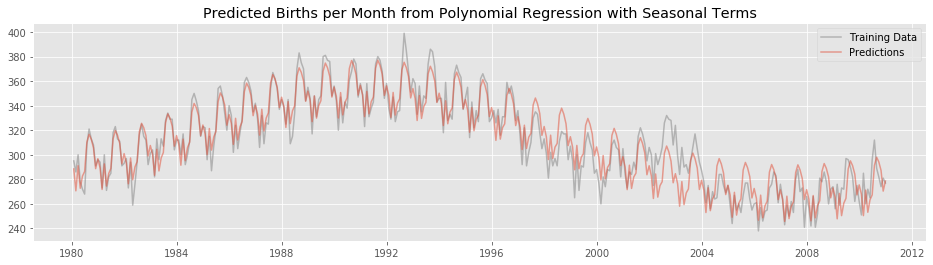

In [31]:
plt.figure(figsize=(16, 4))
plt.plot(births.index, births.num_births, c="grey", alpha=0.5,
         label="Training Data")
plt.plot(births.index, seasonal_model.predict(X), alpha=0.5,
         label="Predictions")
plt.title("Predicted Births per Month from Polynomial Regression with Seasonal Terms")
plt.legend()

Let's extend the data we use, so as to predict to forecast into the future a few years.

In [32]:
def make_extended_births_dataframe(births, end_date):
    date_range_ext = pd.date_range('1980-01', end_date, freq='M')
    births_ext = births.reindex(date_range_ext)
    births_ext['month'] = date_range_ext.month
    births_ext['year'] = date_range_ext.year
    births_ext['epoch'] = np.arange(len(date_range_ext)) + 1
    return births_ext

In [33]:
def make_extended_births_model_plot(end_date):
    births_ext = make_extended_births_dataframe(births, end_date)
    X_ext = poly_basis_and_dummyizer.transform(births_ext)
   
    plt.figure(figsize=(16, 4))
    plt.plot(births_ext.index, births_ext.num_births, c="grey", alpha=0.75, label="Training Data")
    plt.plot(births_ext.index, seasonal_model.predict(X_ext), alpha=0.5, label="Predictions")
    plt.title("Predicted Births per Month from Polynomial Regression with Seasonal Terms")

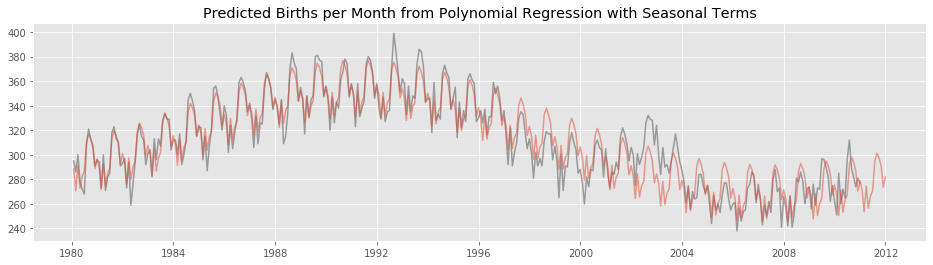

In [34]:
make_extended_births_model_plot('2012-01')

Extending by only one year, the forecasts look reasonable.

But...

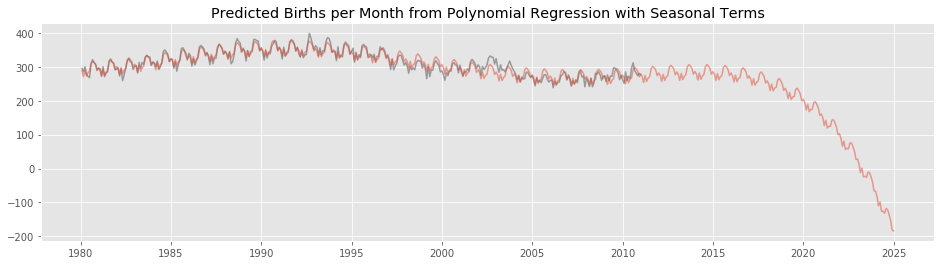

In [35]:
make_extended_births_model_plot('2025-01')

## Yikes!

We probably need some kind of model that does *not* extrapolate such a catastrophic downturn in births (a negative number of births in a month, what does that even mean?).

The downturn here is a common problem when using polynomial regression: polynomial fits tend to behave very poorly near the boundaries of the data they are trained on.  This problem becomes very pronounced as the degree of fit increases.  It is frequently advised *not* to fit a polynomial regression of degree greater than 2; if more non-linearity is needed, natural cubic splines are a better alternative, these will capture non-linearities flexibly, but will axtrapolate *linearly*, which is a conservative approach.

Of course, anytime we are predicting what will happen in the future based on only what happened at various points in time in the past, we should not have the expectation that this is possible too far out into the future.  Damn future.

**Q:** Plot the `dates` variable (`x`) against the residuals (`y`) of the final model (including the seasonality term).
    Is there an obvious pattern of the residuals with respect to time? If there is any autocorrelation left in the 
    model, there will be some pattern in your residual and we'll learn to address that in the afternoon.

Text(0.5, 1.0, 'Residuals from Seasonal Model')

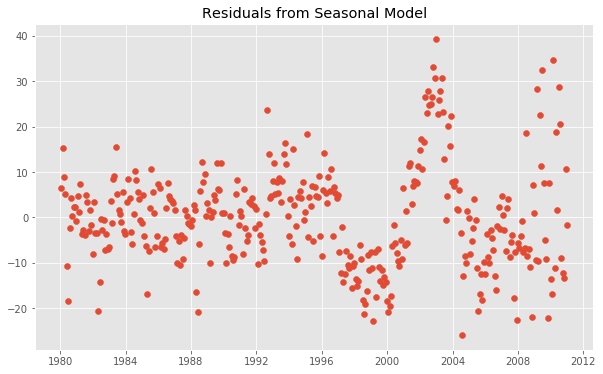

In [36]:
residuals = births.num_births - seasonal_model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(births.index, residuals)
plt.title("Residuals from Seasonal Model")

The very obvious pattern here is caused by our lack of ability to capture the upturn in births between 2000 and 2014.

Disregarding this, the residuals between 1980 and 1996 *still* show some semblance of an oscillatory pattern, hinting that there is more structure in this data to be captured.